<a href="https://colab.research.google.com/github/crestrepoz/Master-s-Degree-in-Data-Science/blob/M%C3%A9t.-Apren.-Auto.-para-Toma-De/Skin_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Unidad 3


1.   Test y aplica la evaluación del modelo
    
    *   Matriz de Confución.
    *   Accuracy.
    *   Sensitivity o Recall.
    *   Specificity.
    *   Precision.
    *   F1-score





In [1]:
pip install ucimlrepo

In [2]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# De acuerdo con lo indicado, la plataforma donde está almacenada la base de datos, entrega el código para cargar la
# información de la base de datos a la libreria

from ucimlrepo import fetch_ucirepo

# fetch dataset
skin_segmentation = fetch_ucirepo(id=229)

# data (as pandas dataframes)
X = skin_segmentation.data.features
y = skin_segmentation.data.targets

# metadata
print(skin_segmentation.metadata)


{'uci_id': 229, 'name': 'Skin Segmentation', 'repository_url': 'https://archive.ics.uci.edu/dataset/229/skin+segmentation', 'data_url': 'https://archive.ics.uci.edu/static/public/229/data.csv', 'abstract': 'The Skin Segmentation dataset is constructed over B, G, R color space. Skin and Nonskin dataset is generated using skin textures from face images of diversity of age, gender, and race people.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Univariate'], 'num_instances': 245057, 'num_features': 3, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Tue Apr 09 2024', 'dataset_doi': '10.24432/C5T30C', 'creators': ['Rajen Bhatt', 'Abhinav Dhall'], 'intro_paper': None, 'additional_info': {'summary': 'The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, midd

In [4]:
# variable information
print(skin_segmentation.variables)

  name     role     type demographic description units missing_values
0    B  Feature  Integer        None        None  None             no
1    G  Feature  Integer        None        None  None             no
2    R  Feature  Integer        None        None  None             no
3    y   Target   Binary        None        None  None             no


In [5]:
# Concatenar la información de las variables almacenadas en X y y en un mismo dataframe
skinseg = pd.concat([X, y], axis=1)

# Mostrar inf df
display(skinseg.head())

,B,G,R,y
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


# **Database Description**

In [6]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = skinseg.shape
shape

(245057, 4)

In [7]:
skinseg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   B       245057 non-null  int64
 1   G       245057 non-null  int64
 2   R       245057 non-null  int64
 3   y       245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


In [8]:
#Cual es el tipo de los atributos?
skinseg.dtypes

,0
B,int64
G,int64
R,int64
y,int64


In [9]:
#Medida de centralidad y desviación para atributos numéricos:
skinseg.describe()

,B,G,R,y
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


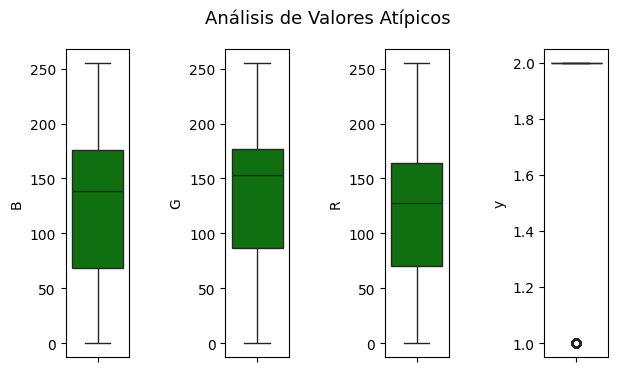

In [10]:
# Dispersion de los datos

fig, axs = plt.subplots(1, 4, figsize = (7,4))
plt.suptitle("Análisis de Valores Atípicos", size = 13)
sns.boxplot(y=skinseg['B'], ax=axs[0], color="green")
sns.boxplot(y=skinseg['G'], ax=axs[1], color="green")
sns.boxplot(y=skinseg['R'], ax=axs[2], color="green")
sns.boxplot(y=skinseg['y'], ax=axs[3], color="green")
#Espacio entre las cajas
fig.subplots_adjust(wspace=1.5)

plt.show()

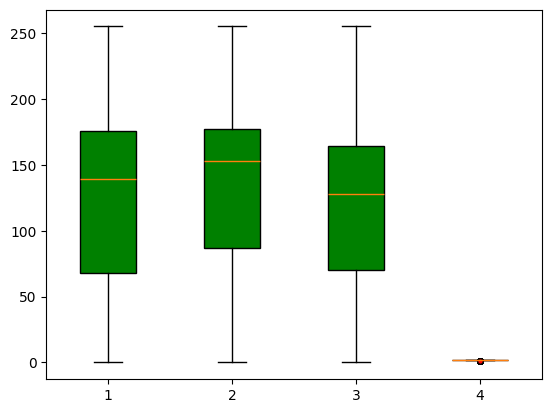

In [11]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((skinseg['B'],skinseg['G'],
            skinseg['R'],skinseg['y']),
            patch_artist=True, # Enable filling boxes with color
            boxprops=dict(facecolor='green'), # Set box color
            flierprops=dict(marker='.', markerfacecolor='red', markersize=8,
                          linestyle='none')) # Set outlier marker style
plt.show()

In [12]:
#Medida de centralidad para atributos categóricos:
#skinseg.mode()
#No debería correrse considerando que no hay datos categoricos

In [13]:
# Calcular matriz de correlaciones (redondeada a 2 decimales)
correlaciones = skinseg.corr().round(2)

# Mostrar en consola
print(correlaciones.to_string())

      B     G     R     y
B  1.00  0.86  0.50  0.09
G  0.86  1.00  0.66 -0.12
R  0.50  0.66  1.00 -0.57
y  0.09 -0.12 -0.57  1.00


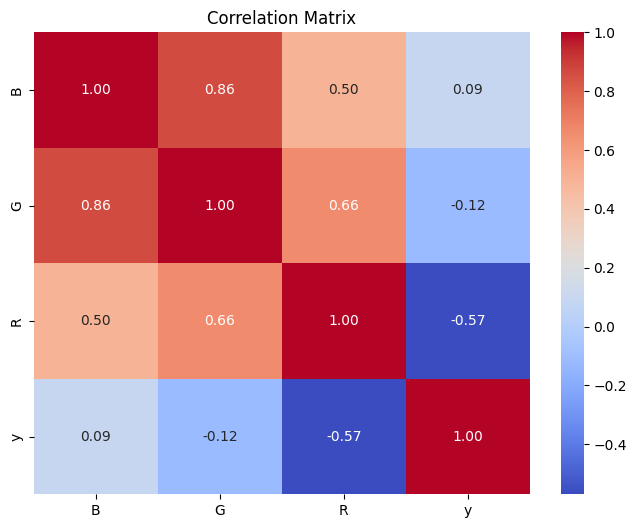

In [14]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

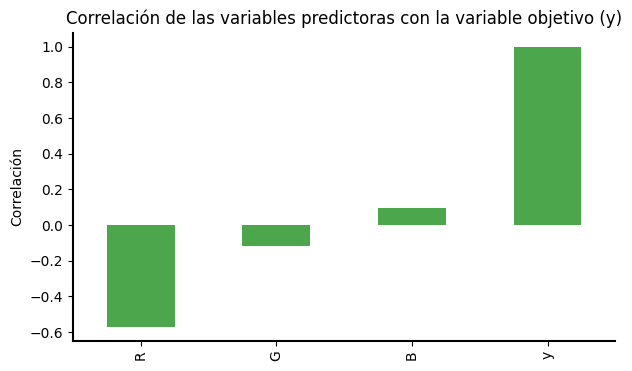

In [15]:
#Correlación con base a la varaible objetivo y
fig, ax = plt.subplots(figsize=(7,4))
skinseg.corr()["y"].sort_values(ascending = True).plot(kind = "bar",
                    color = "green", alpha = 0.7)
plt.title("Correlación de las variables predictoras con la variable objetivo (y)")
plt.ylabel("Correlación")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5)


right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(False, axis='y')
plt.show()

In [16]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(skinseg.isnull().sum(axis=1))

0

In [17]:
#Cuantos datos faltantes hay por cada atributo?
skinseg.isnull().sum()

,0
B,0
G,0
R,0
y,0


In [18]:
skinseg.columns

Index(['B', 'G', 'R', 'y'], dtype='object')

# **Data Preparation**

In [19]:
skinseg.groupby("y").size()

#De acuerdo con  el resultado de esta revisión se toma la decisión de balancear o no la base de datos

,0
y,
1,50859
2,194198


In [20]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = skinseg.groupby('y')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

/tmp/ipython-input-3209491537.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


B    G    R  y
y                        
1 0      180  211  255  1
  1       63  113  166  1
  2      103  150  224  1
  3       69  127  193  1
  4       59  100  149  1
...      ...  ...  ... ..
2 50854  179  177  129  2
  50855   53   53   17  2
  50856  130  133   88  2
  50857    7    8    0  2
  50858  198  198  168  2

[101718 rows x 4 columns]

In [21]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['y'].value_counts())

y
1    50859
2    50859
Name: count, dtype: int64


# **Modeling**

In [22]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.base import clone
import numpy as np

In [23]:
# Variables
X = dataBal[["B","G","R"]]
y = dataBal["y"].map({1:0, 2:1})  # 0=Skin, 1=Non-skin

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(76288, 3) (76288,)
(25430, 3) (25430,)


In [25]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test
logisticRegr = LogisticRegression(solver="lbfgs", max_iter=1000)
# lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) es el default recomendado para problemas de clasificación multiclase y funciona bien con datasets medianos
# tol Es la tolerancia de convergencia, Preguntar en que casos se usa?????
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(76288, 3) (76288,)
(25430, 3) (25430,)


In [27]:
# Incluir esquema de validación “N-folds validation” con N=101) N-folds validation (N=10) – validación cruzada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
pos_label = 1  # define cuál es la clase positiva (1=Non-skin, 0=Skin)

# Acumuladores para matriz y métricas
tn_sum = fp_sum = fn_sum = tp_sum = 0
accs, precs, recs, f1s, specs = [], [], [], [], []

for train_idx, test_idx in skf.split(X, y):
    Xtr, Xte = X.iloc[train_idx], X.iloc[test_idx]
    ytr, yte = y.iloc[train_idx], y.iloc[test_idx]

    model = LogisticRegression(solver="lbfgs", max_iter=1000)
    model.fit(Xtr, ytr)
    yhat = model.predict(Xte)

In [28]:
# Matriz de confusión fold – validación cruzada
tn, fp, fn, tp = confusion_matrix(yte, yhat, labels=[0,1]).ravel()
tn_sum += tn; fp_sum += fp; fn_sum += fn; tp_sum += tp

# Métricas fold – validación cruzada
accs.append(accuracy_score(yte, yhat))
precs.append(precision_score(yte, yhat, pos_label=pos_label, zero_division=0))
recs.append(recall_score(yte, yhat, pos_label=pos_label, zero_division=0)) # Sensitivity
f1s.append(f1_score(yte, yhat, pos_label=pos_label, zero_division=0))
specs.append(tn / (tn + fp))  # Specificity

# ---- Resultados globales ----
print("=== Matriz de confusión agregada (10 folds) – validación cruzada ===")
print(np.array([[tn_sum, fp_sum],
                [fn_sum, tp_sum]]))

print("\n=== Métricas promedio (10 folds) ===")
print(f"Accuracy    : {np.mean(accs):.4f}")
print(f"Precision   : {np.mean(precs):.4f}")
print(f"Sensitivity : {np.mean(recs):.4f}")   # Recall
print(f"Specificity : {np.mean(specs):.4f}")
print(f"F1-score    : {np.mean(f1s):.4f}")

=== Matriz de confusión agregada (10 folds) – validación cruzada ===
[[4934  151]
 [ 403 4683]]

=== Métricas promedio (10 folds) ===
Accuracy    : 0.9455
Precision   : 0.9688
Sensitivity : 0.9208
Specificity : 0.9703
F1-score    : 0.9442


In [29]:
# Incluir esquema de validación “random subsampling”, partición 70/30, 10 Repeticiones

POS_LABEL = 1

# Acumuladores
accs, precs, recs, f1s, specs = [], [], [], [], []
tn_sum = fp_sum = fn_sum = tp_sum = 0

for seed in range(10):  # 10 repeticiones
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=seed, stratify=y
    )
    logisticRegr.fit(X_train, y_train)
    y_pred = logisticRegr.predict(X_test)

In [30]:
# Matriz de confusión de cada repetición “random subsampling”, partición 70/30, 10 Repeticiones
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
tn_sum += tn; fp_sum += fp; fn_sum += fn; tp_sum += tp

# Métricas por repetición
accs.append(accuracy_score(y_test, y_pred))
precs.append(precision_score(y_test, y_pred, pos_label=POS_LABEL, zero_division=0))
recs.append(recall_score(y_test, y_pred, pos_label=POS_LABEL, zero_division=0))   # Sensitivity
f1s.append(f1_score(y_test, y_pred, pos_label=POS_LABEL, zero_division=0))
specs.append(tn / (tn + fp) if (tn + fp) > 0 else 0.0)  # Specificity

# ---- Resultados agregados ----
print("=== Random Subsampling 70/30 (10 repeticiones) ===")
print(f"Accuracy    : {np.mean(accs):.4f} ± {np.std(accs):.4f}")
print(f"Precision   : {np.mean(precs):.4f} ± {np.std(precs):.4f}")
print(f"Sensitivity : {np.mean(recs):.4f} ± {np.std(recs):.4f}")  # Recall
print(f"Specificity : {np.mean(specs):.4f} ± {np.std(specs):.4f}")
print(f"F1-score    : {np.mean(f1s):.4f} ± {np.std(f1s):.4f}")

print("\n=== Matriz de confusión agregada (suma de 10 repeticiones) ===")
conf_agregada = np.array([[tn_sum, fp_sum],
                          [fn_sum, tp_sum]])
print(conf_agregada)

=== Random Subsampling 70/30 (10 repeticiones) ===
Accuracy    : 0.9413 ± 0.0000
Precision   : 0.9607 ± 0.0000
Sensitivity : 0.9202 ± 0.0000
Specificity : 0.9623 ± 0.0000
F1-score    : 0.9400 ± 0.0000

=== Matriz de confusión agregada (suma de 10 repeticiones) ===
[[14683   575]
 [ 1217 14041]]


## Conclusión

De acuerdo con lo requerido y según los resultados obtenidos, se puede concluir que, una vez evaluado el modelo de regresión logística con los dos esquemas de validación indicados “N-folds validation” y “random subsampling”, se obtuvieron desempeños muy altos en ambos casos, ambos resultados son superiores al 94% de exactitud. Sin embargo, la validación cruzada con N-folds validation mostró mejores resultados globales: mayor accuracy (94.6% frente a 94.1%), mayor precision y specificity, además de un menor número de falsos positivos y falsos negativos. El esquema de random subsampling 70/30 alcanzó métricas muy similares, pero presentó más errores al clasificar tanto piel como no piel, especialmente en los falsos negativos. En conclusión, aunque ambos métodos confirman que el modelo es robusto, la validación cruzada de N-folds validation es la que ofrece un desempeño más confiable y estable.